### xG model: Logistic regression
This notebook trains a logistic regression model using shots data retrieved from Statsboms API and the following features:
- shot_technique
- shot_angle
- distance_to_goal
- goalkeeper_x, goalkeeper_y
- shot_body_part
- shot_type
- X, Y

imports

In [1]:
import pandas as pd 
import numpy as np
from mplsoccer import Pitch 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

Load data

In [2]:
df= pd.read_parquet('output/prep_shots.parquet')
df.drop(columns= ["id", "index", "match_id", "shot_first_time", "under_pressure"], inplace= True)
features= df.drop(columns= ["goal"])
y= df.goal

In [3]:
df.head()

,shot_technique,shot_body_part,shot_type,goal,X,Y,shot_angle,distance_to_goal,goalkeeper_x,goalkeeper_y
0,Normal,Foot,Open Play,0,104.1,27.2,0.113357,10.800463,117.7,37.3
1,Normal,Foot,Open Play,1,111.3,27.5,0.103308,12.788276,119.1,36.7
2,Half Volley,Foot,Open Play,0,101.4,36.8,0.121882,2.863564,118.1,39.1
3,Normal,Foot,Open Play,0,100.7,32.2,0.121732,6.673080,117.0,38.7
4,Normal,Foot,Free Kick,0,87.2,46.1,0.153772,18.650737,118.0,40.1


Split data into training and testing data

In [4]:
x_train, x_test, y_train, y_test= train_test_split(features, y, test_size= .2, random_state= 42, stratify= y)

Transform categorical data before fitting the model

In [5]:
ct = ColumnTransformer(
    [('oh_encoder', OneHotEncoder(), ['shot_technique', 'shot_body_part', 'shot_type'])], 
    remainder='passthrough')

model = Pipeline([
    ('ct', ct),
    ('lr', LogisticRegression(solver='lbfgs'))
])

model.fit(x_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oh_encoder', OneHotEncoder(),
                                                  ['shot_technique',
                                                   'shot_body_part',
                                                   'shot_type'])])),
                ('lr', LogisticRegression())])

make predictions

In [6]:
y_pred = model.predict(x_test)

model accuracy

In [7]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 88.91%


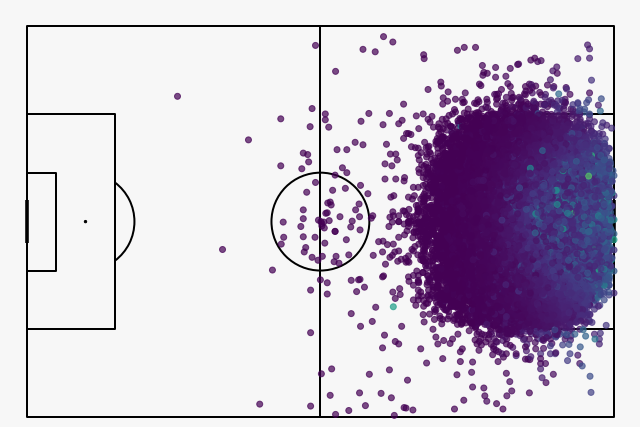

In [8]:
# Set football pitch
pitch= Pitch(pad_bottom= 0.5, goal_alpha= 0.8,
                      pitch_color= '#f7f7f7', line_color= 'black') 
fig, ax= pitch.draw(figsize=(9, 10))
fig.set_facecolor('#f7f7f7')

# Plot the predicted shots 
plt.scatter(df['X'], df['Y'], c= model.predict_proba(df)[:,1], alpha= 0.7)
plt.show()

The shots map simply shows that the model is still not capable of properly detecting if a shot will result in a goal because we're not anticipating more yellow around the goal area to indicate a shot's high likelihood of becoming a goal is much higher